#Reto Empresarial - Ejercicio Orquídeas Iris- Daniel Afanador

Ejercicio 1 - Perceptron:

In [1]:
#-- Importamos las librerías necesarias para ejecutar los siguientes bloques de código.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#-- Leemos los datos y cambiamos los nombres de cada columna tabulada en concordancia con el dataset de Orquídeas.

data = pd.read_csv('iris.data', names=['Longitud del Sépalo', 'Ancho del Sépalo',"Longitud del Pétalo","Ancho del Pétalo","Tipo de Flor"])
data.head()

,Longitud del Sépalo,Ancho del Sépalo,Longitud del Pétalo,Ancho del Pétalo,Tipo de Flor
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


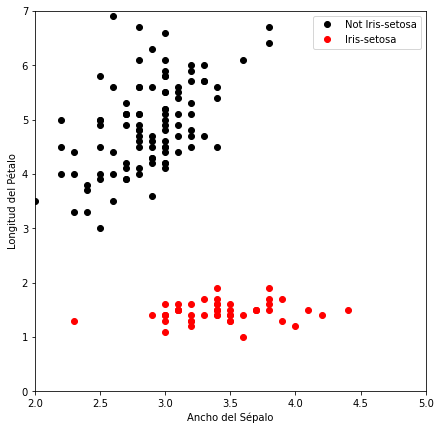

In [2]:
#-- Seleccionamos 2 de los 4 parámetros e incluímos los datos del objetivo.

x1 = data['Ancho del Sépalo']
x2 = data['Longitud del Pétalo']
Iris = data['Tipo de Flor']

#-- Convertimos nuestro objetivo en un problema binario.

class_0 = Iris != 'Iris-setosa' # Esto es una máscara para los que NO son Iris-setosa
class_1 = Iris == 'Iris-setosa' # Esto es una máscara para los que son Iris-setosa

#-- Graficamos los puntos con sus correspondientes clases.
#-- Puntos de color negro para flores distintas a la Iris-setosa.
#-- Puntos de color rojo para flores de tipo Iris-setosa.

fig = plt.figure(figsize=(7,7))
plt.plot(x1[class_0],x2[class_0],'o', c='black', label='Not Iris-setosa')
plt.plot(x1[class_1],x2[class_1],'o', c='red', label='Iris-setosa')
plt.xlim(2,5)
plt.ylim(0,7)
plt.xlabel('Ancho del Sépalo')
plt.ylabel('Longitud del Pétalo')
plt.legend()
plt.show()

In [3]:
#-- Definimos una función que cambie los datos de Tipo de Flor.
#-- La función cambia el dato a 0 si NO es Iris-setosa.
#-- La función cambia el dato a 1 si es Iris-setosa.

def cambiarIrisSetosaAValorCuantitativo(Y):
  for i in range(len(Y)):
    if (Y[i] == 'Iris-setosa'):
      Y[i] = 1
    else:
      Y[i] = 0

In [4]:
cambiarIrisSetosaAValorCuantitativo(Iris)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [5]:
#-- Función que queremos encontrar para clasificar los Iris-setosa y los NO Iris-setosa.
def y(x):
 return -(b + w_1*x)/w_2

In [6]:
#-- Definimos nuestra función de activación, en este caso usamos una tangente hiperbólica.
def act(z):
  return np.tanh(z)

Epoch [1/10], bias: 0.0, w1: 0.1499999999999999, w2: -1.6500000000000001


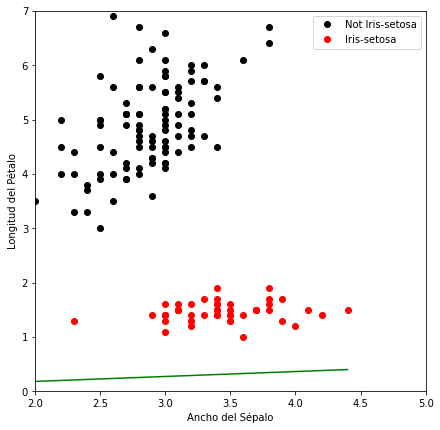

Epoch [2/10], bias: 0.0, w1: 0.2999999999999998, w2: -3.3000000000000003


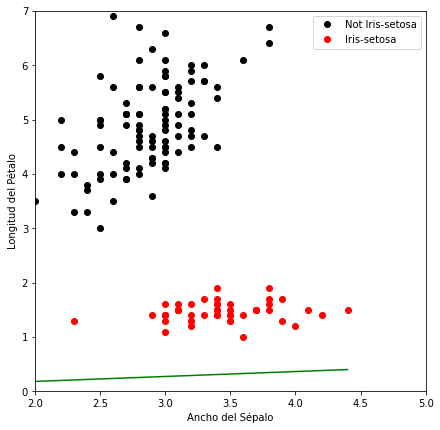

Epoch [3/10], bias: 0.5, w1: 2.05, w2: -2.6000000000000005


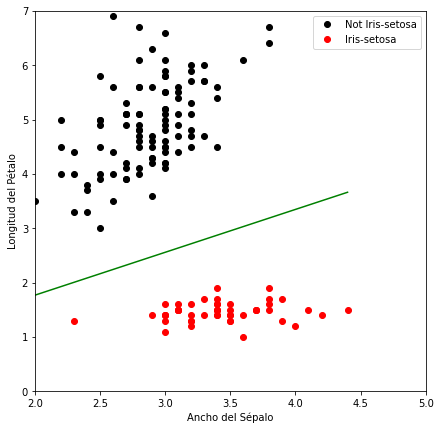

Epoch [4/10], bias: 0.5, w1: 2.05, w2: -2.6000000000000005


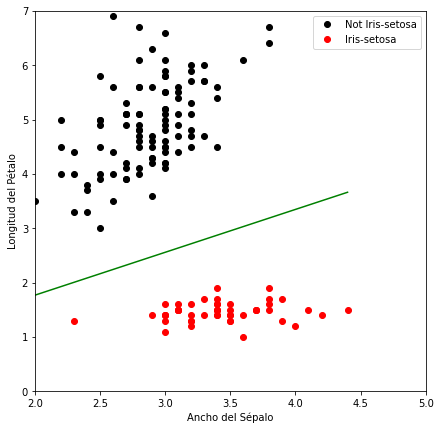

Epoch [5/10], bias: 0.5, w1: 2.05, w2: -2.6000000000000005


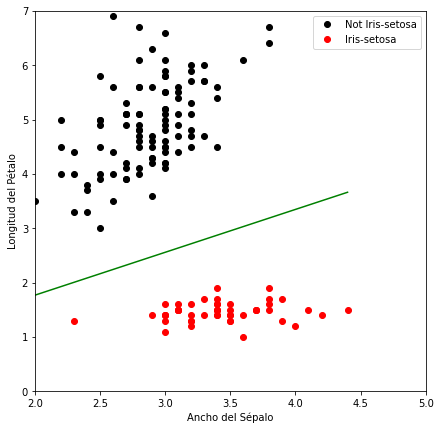

Epoch [6/10], bias: 0.5, w1: 2.05, w2: -2.6000000000000005


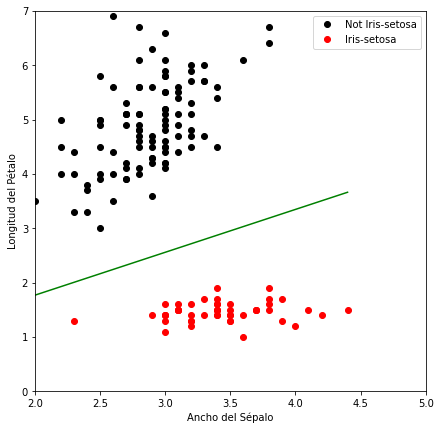

Epoch [7/10], bias: 0.5, w1: 2.05, w2: -2.6000000000000005


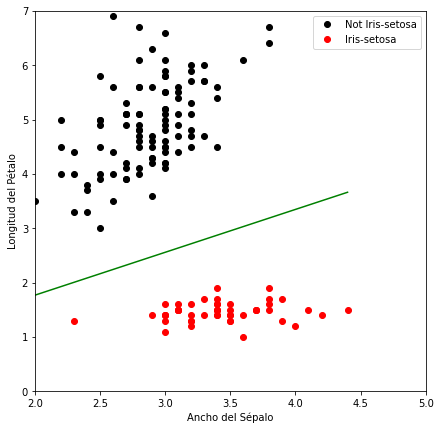

Epoch [8/10], bias: 0.5, w1: 2.05, w2: -2.6000000000000005


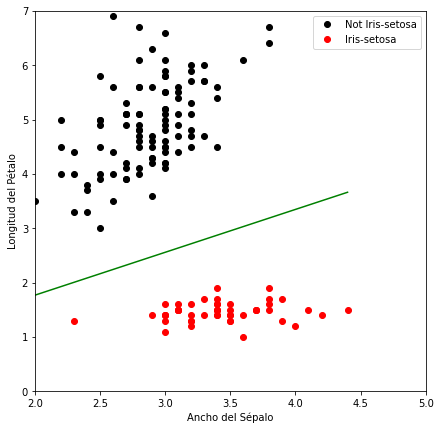

Epoch [9/10], bias: 0.5, w1: 2.05, w2: -2.6000000000000005


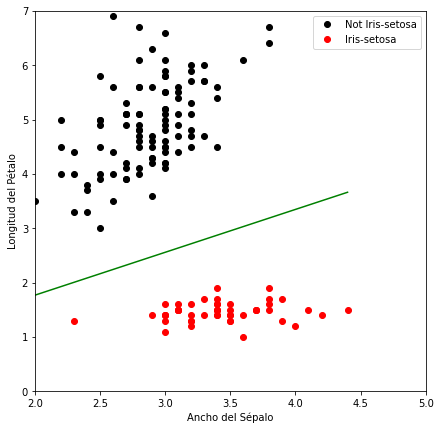

Epoch [10/10], bias: 0.5, w1: 2.05, w2: -2.6000000000000005


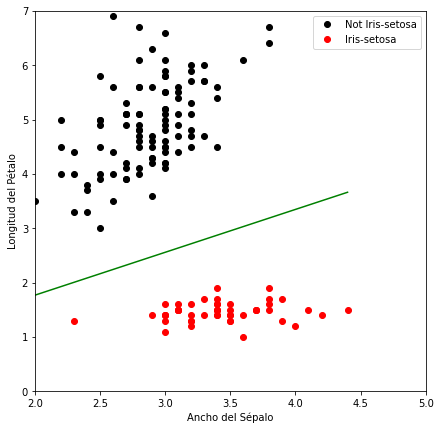

In [7]:
#-- Definimos el Perceptron

# Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

# Inicializamos el número de épocas y la tasa de aprendizaje
n_epochs = 10 # Número de épocas
n = 0.5       # Tasa de aprendizaje

# Entrenamos el Perceptron
for epoch in range(n_epochs):
  for i,j,k in zip(x1,x2,Iris):
    
    # Función de Suma
    z = i*w_1 + j*w_2 + b

    # Función de Activación
    sig_z = act(z)

    # Evaluamos la salida (output)
    if sig_z >= 0.5:
      out = 1
    if sig_z < 0.5:
      out = 0
    
    # Calculamos el error
    error = k - out

    # Actualizamos los pesos
    b = b + n*error
    w_1 += n*error*i
    w_2 += n*error*j

  print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

  fig = plt.figure(figsize=(7,7))
  plt.plot(x1[class_0],x2[class_0],'o', c='black', label='Not Iris-setosa')
  plt.plot(x1[class_1],x2[class_1],'o', c='red', label='Iris-setosa')
  plt.plot(np.sort(x1),y(np.sort(x1)),'-', c='green')
  plt.xlim(2,5)
  plt.ylim(0,7)
  plt.xlabel('Ancho del Sépalo')
  plt.ylabel('Longitud del Pétalo')
  plt.legend()
  plt.show()

Ejercicio 2 - MLP:

In [8]:
#--- Leemos nuevamente los datos con pandas

data = pd.read_csv('iris.data', names=['Longitud del Sépalo', 'Ancho del Sépalo',"Longitud del Pétalo","Ancho del Pétalo","Tipo de Flor"])

#-- Identificamos los nombres de las columnas

data.keys()

Index(['Longitud del Sépalo', 'Ancho del Sépalo', 'Longitud del Pétalo',
       'Ancho del Pétalo', 'Tipo de Flor'],
      dtype='object')

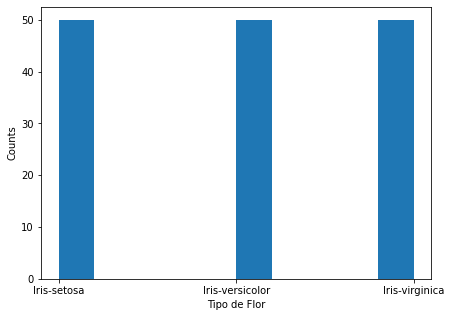

In [9]:
#-- Cargamos los parámetros y los objetivos.

X = data.drop(['Tipo de Flor'], axis = 'columns')
Y = data['Tipo de Flor']

fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('Tipo de Flor')
plt.show()

In [10]:
#--- Dividimos nuestro dataset en Train/Test.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

2.1: Primer modelo con 2 capas: hidden_layer_sizes=(7,7).

In [11]:
#--- Cargamos MLPCLassifier para buscar un modelo.

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(7,7), solver='adam', learning_rate_init=0.1, random_state=1)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 7), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
#--- Entrenamos el modelo y realizamos una predicción.

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [13]:
Y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

In [14]:
#--- Evaluamos el modelo con el accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_test)

0.9210526315789473

2.2: Segundo modelo con 3 capas: hidden_layer_sizes=(7,7,7).

In [15]:
#--- Cargamos MLPCLassifier para buscar un modelo

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(7,7,7), solver='adam', learning_rate_init=0.1, random_state=1)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 7, 7), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
#--- Entrenamos el modelo y realizamos una predicción

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [17]:
Y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

In [18]:
#--- Evaluamos el modelo con el accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_test)

0.9473684210526315

Se observa que el modelo con 3 capas tiene mayor precisión que el modelo con 2 capas.